In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import io
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_outbreak.csv to covid_outbreak.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['covid_outbreak.csv']))
print(df)

             date  ... number_ongoing_outbreaks
0      2020-11-01  ...                        1
1      2020-11-01  ...                        2
2      2020-11-01  ...                        1
3      2020-11-01  ...                        1
4      2020-11-01  ...                        1
...           ...  ...                      ...
35298  2021-11-13  ...                        1
35299  2021-11-13  ...                        1
35300  2021-11-13  ...                        2
35301  2021-11-13  ...                        6
35302  2021-11-13  ...                       14

[35303 rows x 5 columns]


SHAPE DIMENSIONS OF DATASET

In [4]:
df.columns


Index(['date', 'phu_name', 'phu_num', 'outbreak_group',
       'number_ongoing_outbreaks'],
      dtype='object')

In [5]:
df.shape

(35303, 5)

INFORMATIONS ABOUT THE DATATYPES

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35303 entries, 0 to 35302
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      35303 non-null  object
 1   phu_name                  35303 non-null  object
 2   phu_num                   35303 non-null  int64 
 3   outbreak_group            35303 non-null  object
 4   number_ongoing_outbreaks  35303 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


FIRST 10 ROWS OF THE DATASET


In [7]:
print(df.head())

         date      phu_name  ...     outbreak_group number_ongoing_outbreaks
0  2020-11-01  BRANT COUNTY  ...        4 Workplace                        1
1  2020-11-01  BRANT COUNTY  ...  1 Congregate Care                        2
2  2020-11-01  CHATHAM-KENT  ...     5 Recreational                        1
3  2020-11-01  CHATHAM-KENT  ...    6 Other/Unknown                        1
4  2020-11-01  CHATHAM-KENT  ...        4 Workplace                        1

[5 rows x 5 columns]


DATA DESCRIPTION ON NUMERICAL VALUES


In [8]:
print(df.describe())

            phu_num  number_ongoing_outbreaks
count  35303.000000              35303.000000
mean    2472.217970                  5.207971
std      682.899791                  9.452923
min     2226.000000                  1.000000
25%     2238.000000                  1.000000
50%     2253.000000                  2.000000
75%     2265.000000                  5.000000
max     5183.000000                123.000000


CHECKING ON MISSING VALUES

In [9]:
print(df.isnull().sum())

date                        0
phu_name                    0
phu_num                     0
outbreak_group              0
number_ongoing_outbreaks    0
dtype: int64


CHECKING DUPLICATE VALUES


In [10]:
duplicate = df[df.duplicated()]
print(duplicate.sum())

date                        0.0
phu_name                    0.0
phu_num                     0.0
outbreak_group              0.0
number_ongoing_outbreaks    0.0
dtype: float64


CORRELATION

In [11]:
print(df.corr())

                           phu_num  number_ongoing_outbreaks
phu_num                   1.000000                  0.113302
number_ongoing_outbreaks  0.113302                  1.000000


ELIMINATING NULL VALUES IN COLOUMN TO AVOID ERRORS

In [12]:
df.dropna(inplace=True)

NEW DATAFRAME WITH SPLIT VALUE COLOUMNS

In [13]:
new = df["outbreak_group"].str.split(" ",n=1,expand=True)

SEPERATE FIRST COLOUMN NAME FOR NEW DATA FRAME 

In [14]:
df["group_id"] = new[0]
df["group_name"] = new[1]

DROPPING OLD COLOMN NAMES

In [15]:
df.drop(columns = ["outbreak_group"],inplace=True)
print(df)


             date              phu_name  ...  group_id       group_name
0      2020-11-01          BRANT COUNTY  ...         4        Workplace
1      2020-11-01          BRANT COUNTY  ...         1  Congregate Care
2      2020-11-01          CHATHAM-KENT  ...         5     Recreational
3      2020-11-01          CHATHAM-KENT  ...         6    Other/Unknown
4      2020-11-01          CHATHAM-KENT  ...         4        Workplace
...           ...                   ...  ...       ...              ...
35298  2021-11-13  WINDSOR-ESSEX COUNTY  ...         1  Congregate Care
35299  2021-11-13           YORK REGION  ...         6    Other/Unknown
35300  2021-11-13           YORK REGION  ...         5     Recreational
35301  2021-11-13           YORK REGION  ...         4        Workplace
35302  2021-11-13           YORK REGION  ...         3        Education

[35303 rows x 6 columns]


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35303 entries, 0 to 35302
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      35303 non-null  object
 1   phu_name                  35303 non-null  object
 2   phu_num                   35303 non-null  int64 
 3   number_ongoing_outbreaks  35303 non-null  int64 
 4   group_id                  35303 non-null  object
 5   group_name                35303 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [17]:
df["group_id"] = df["group_id"].astype(str).astype(int)
print(df.dtypes)

date                        object
phu_name                    object
phu_num                      int64
number_ongoing_outbreaks     int64
group_id                     int64
group_name                  object
dtype: object


In [18]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
print(df)

            date              phu_name  ...       group_name  day_of_week
0     2020-11-01          BRANT COUNTY  ...        Workplace       Sunday
1     2020-11-01          BRANT COUNTY  ...  Congregate Care       Sunday
2     2020-11-01          CHATHAM-KENT  ...     Recreational       Sunday
3     2020-11-01          CHATHAM-KENT  ...    Other/Unknown       Sunday
4     2020-11-01          CHATHAM-KENT  ...        Workplace       Sunday
...          ...                   ...  ...              ...          ...
35298 2021-11-13  WINDSOR-ESSEX COUNTY  ...  Congregate Care     Saturday
35299 2021-11-13           YORK REGION  ...    Other/Unknown     Saturday
35300 2021-11-13           YORK REGION  ...     Recreational     Saturday
35301 2021-11-13           YORK REGION  ...        Workplace     Saturday
35302 2021-11-13           YORK REGION  ...        Education     Saturday

[35303 rows x 7 columns]


In [19]:
print(df.group_id.value_counts())
print(df.max())

4    7694
1    7091
3    6304
2    5665
5    5442
6    3107
Name: group_id, dtype: int64
date                        2021-11-13 00:00:00
phu_name                            YORK REGION
phu_num                                    5183
number_ongoing_outbreaks                    123
group_id                                      6
group_name                            Workplace
day_of_week                           Wednesday
dtype: object


In [63]:
print(df.groupby('phu_name').mean('number_ongoing_outbreaks'))

h = df.groupby('group_name').sum('number_ongoing_outbreaks')

                                         number_ongoing_outbreaks  group_id
phu_name                                                                   
ALGOMA DISTRICT                                          1.470684  3.529316
BRANT COUNTY                                             1.898349  3.050391
CHATHAM-KENT                                             1.651948  3.277922
CITY OF HAMILTON                                         4.712033  3.181075
CITY OF OTTAWA                                           6.025983  3.127249
DURHAM REGION                                            5.381437  3.228144
EASTERN ONTARIO                                          3.453107  2.651977
GREY BRUCE                                               1.289474  3.163968
HALDIMAND-NORFOLK                                        2.721769  3.128056
HALIBURTON, KAWARTHA, PINE RIDGE                         1.652098  2.608392
HALTON REGION                                            4.698842  3.175676
HASTINGS & P

In [22]:
print(h)

                    phu_num  number_ongoing_outbreaks  group_id
group_name                                                     
Congregate Care    17734136                     51412      7091
Congregate Living  13805126                     22349     11330
Education          15666860                     40184     18912
Other/Unknown       7683452                      5012     18642
Recreational       13139926                     12326     27210
Workplace          19247211                     52574     30776


VISUALISATION IN HISTOGRAM

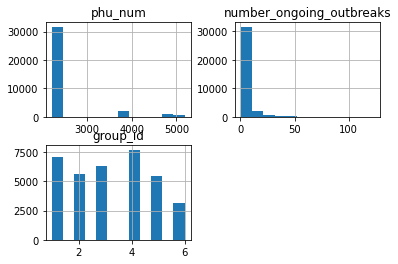

In [27]:
hist=df.hist(bins=12)
plt.show()

CREATE A FIGURE INSTANCE

In [30]:
fig = plt.figure(1,figsize=(9,6))

<Figure size 648x432 with 0 Axes>

CREATE AN AXES INTANCE

In [31]:
ax = fig.add_subplot(111)

FINDING OUTLIERS

In [32]:
fig = plt.figure(figsize=(10,7))


<Figure size 720x504 with 0 Axes>

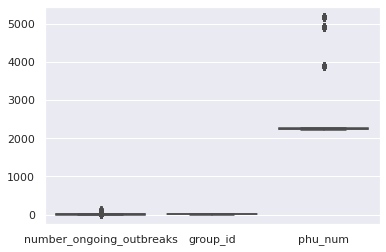

In [33]:
sns.set(style ="darkgrid")
sns.boxplot(data = df.loc[:,['number_ongoing_outbreaks','group_id','phu_num']])
plt.show()

**Submission #2 DATA CLEANING AND ANALYSIS. ** 







CLEAN DATA BY DROP PHU NUMBER

In [34]:
df.drop('phu_num', inplace=True, axis=1)
print(df)

            date              phu_name  ...       group_name  day_of_week
0     2020-11-01          BRANT COUNTY  ...        Workplace       Sunday
1     2020-11-01          BRANT COUNTY  ...  Congregate Care       Sunday
2     2020-11-01          CHATHAM-KENT  ...     Recreational       Sunday
3     2020-11-01          CHATHAM-KENT  ...    Other/Unknown       Sunday
4     2020-11-01          CHATHAM-KENT  ...        Workplace       Sunday
...          ...                   ...  ...              ...          ...
35298 2021-11-13  WINDSOR-ESSEX COUNTY  ...  Congregate Care     Saturday
35299 2021-11-13           YORK REGION  ...    Other/Unknown     Saturday
35300 2021-11-13           YORK REGION  ...     Recreational     Saturday
35301 2021-11-13           YORK REGION  ...        Workplace     Saturday
35302 2021-11-13           YORK REGION  ...        Education     Saturday

[35303 rows x 6 columns]


In [35]:
df.head()

,date,phu_name,number_ongoing_outbreaks,group_id,group_name,day_of_week
0,2020-11-01,BRANT COUNTY,1,4,Workplace,Sunday
1,2020-11-01,BRANT COUNTY,2,1,Congregate Care,Sunday
2,2020-11-01,CHATHAM-KENT,1,5,Recreational,Sunday
3,2020-11-01,CHATHAM-KENT,1,6,Other/Unknown,Sunday
4,2020-11-01,CHATHAM-KENT,1,4,Workplace,Sunday


In [85]:
gh= df.groupby('group_name').sum('number_ongoing_outbreaks')
gh
gh.drop('group_id', inplace=True, axis=1)
print(gh)




                   number_ongoing_outbreaks
group_name                                 
Congregate Care                       51412
Congregate Living                     22349
Education                             40184
Other/Unknown                          5012
Recreational                          12326
Workplace                             52574


Text(0.5, 1.0, 'covid outbreak by group')

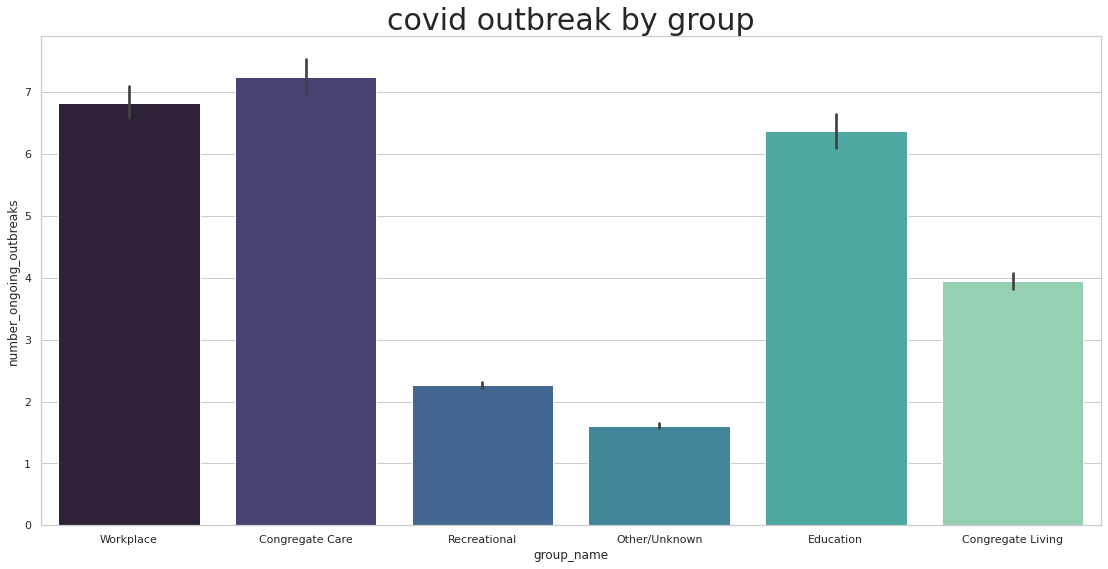

In [86]:
df.group_name.value_counts()
sns.set(style='whitegrid')
plt.figure(figsize=(19,9))
a=sns.barplot(x='group_name',y='number_ongoing_outbreaks',data=df,palette='mako')
#plt.xticks(rotation=90,size=12)
plt.title('covid outbreak by group',size=30)

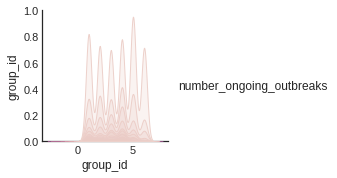

In [60]:
sns.pairplot(df, hue="number_ongoing_outbreaks")


In [61]:
df.describe()

,number_ongoing_outbreaks,group_id
count,35303.000000,35303.000000
mean,5.207971,3.228083
std,9.452923,1.593297
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,5.000000,4.000000
max,123.000000,6.000000


In [62]:
df.loc[df['number_ongoing_outbreaks'] == min(df['number_ongoing_outbreaks'])]

,date,phu_name,number_ongoing_outbreaks,group_id,group_name,day_of_week
0,2020-11-01,BRANT COUNTY,1,4,Workplace,Sunday
2,2020-11-01,CHATHAM-KENT,1,5,Recreational,Sunday
3,2020-11-01,CHATHAM-KENT,1,6,Other/Unknown,Sunday
4,2020-11-01,CHATHAM-KENT,1,4,Workplace,Sunday
5,2020-11-01,CITY OF HAMILTON,1,3,Education,Sunday
...,...,...,...,...,...,...
35290,2021-11-13,WELLINGTON-DUFFERIN-GUELPH,1,4,Workplace,Saturday
35292,2021-11-13,WELLINGTON-DUFFERIN-GUELPH,1,1,Congregate Care,Saturday
35294,2021-11-13,WINDSOR-ESSEX COUNTY,1,5,Recreational,Saturday
35298,2021-11-13,WINDSOR-ESSEX COUNTY,1,1,Congregate Care,Saturday


In [88]:
df.loc[df['number_ongoing_outbreaks'] == max(df['number_ongoing_outbreaks'])]

,date,phu_name,number_ongoing_outbreaks,group_id,group_name,day_of_week
19194,2021-04-14,TORONTO,123,3,Education,Wednesday


 ***Is covid outbreaks high in weekends or weekdays?***

In [89]:
df['weekend/day'] = df['day_of_week'].apply(lambda x:  "Weekend" if x == "Sunday" or x=="Saturday" else "WeekDAYS")
df

,date,phu_name,number_ongoing_outbreaks,group_id,group_name,day_of_week,weekend/day
0,2020-11-01,BRANT COUNTY,1,4,Workplace,Sunday,Weekend
1,2020-11-01,BRANT COUNTY,2,1,Congregate Care,Sunday,Weekend
2,2020-11-01,CHATHAM-KENT,1,5,Recreational,Sunday,Weekend
3,2020-11-01,CHATHAM-KENT,1,6,Other/Unknown,Sunday,Weekend
4,2020-11-01,CHATHAM-KENT,1,4,Workplace,Sunday,Weekend
...,...,...,...,...,...,...,...
35298,2021-11-13,WINDSOR-ESSEX COUNTY,1,1,Congregate Care,Saturday,Weekend
35299,2021-11-13,YORK REGION,1,6,Other/Unknown,Saturday,Weekend
35300,2021-11-13,YORK REGION,2,5,Recreational,Saturday,Weekend
35301,2021-11-13,YORK REGION,6,4,Workplace,Saturday,Weekend


In [90]:
df3=df.groupby(['weekend/day'])['number_ongoing_outbreaks'].sum()
df3


weekend/day
WeekDAYS    131126
Weekend      52731
Name: number_ongoing_outbreaks, dtype: int64

Text(0, 0.5, 'Total outbreaks in Ontario')

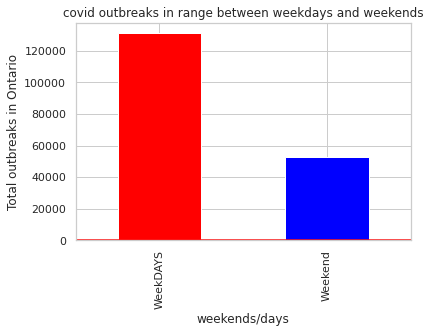

In [91]:
plt.figure();
df3.plot(kind='bar',color=['red','blue']); 
plt.axhline(0, color='red')
plt.title('covid outbreaks in range between weekdays and weekends')
plt.xlabel('weekends/days')
plt.ylabel('Total outbreaks in Ontario')


**In which month covid outbreak get hype?**

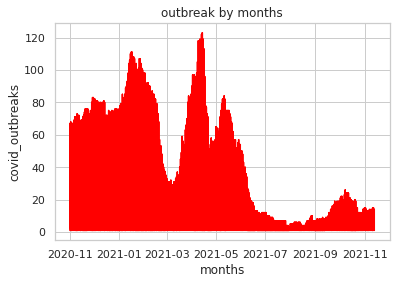

In [92]:
plt.plot(df['date'],df['number_ongoing_outbreaks'], color='red')
plt.grid(True)
plt.title ('outbreak by months')
plt.xlabel('months') 
plt.ylabel('covid_outbreaks') 
plt.show()

**Correlation matrix**

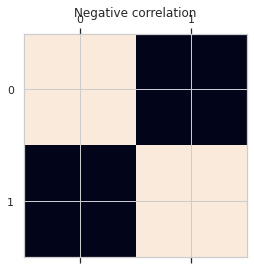

In [93]:
plt.matshow(df.corr())
plt.title('Negative correlation')
plt.show()



In [94]:
maxdf=df.groupby(['phu_name','group_name','group_id','number_ongoing_outbreaks'])['number_ongoing_outbreaks'].max()
print(maxdf)
mindf=df.groupby(['phu_name','group_name','group_id','number_ongoing_outbreaks'])['number_ongoing_outbreaks'].min()
print(mindf)

phu_name         group_name         group_id  number_ongoing_outbreaks
ALGOMA DISTRICT  Congregate Care    1         1                            1
                                              2                            2
                 Congregate Living  2         1                            1
                 Education          3         1                            1
                                              2                            2
                                                                          ..
YORK REGION      Workplace          4         45                          45
                                              46                          46
                                              47                          47
                                              48                          48
                                              51                          51
Name: number_ongoing_outbreaks, Length: 1953, dtype: int64
phu_name         group_

**Percentage of covid outbreak in Ontario by cities**

---



In [95]:
px.pie(df, values='number_ongoing_outbreaks', names='phu_name', title='covid ongoing outbreaks in ontario', color_discrete_sequence=px.colors.sequential.RdBu)

In [96]:
fig2= px.bar(df, y='number_ongoing_outbreaks', x='phu_name',text='number_ongoing_outbreaks',title='Covid outbreaks in ontario by groups', color='group_name')
fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig2.update_layout(xaxis_tickangle=-45)
fig2

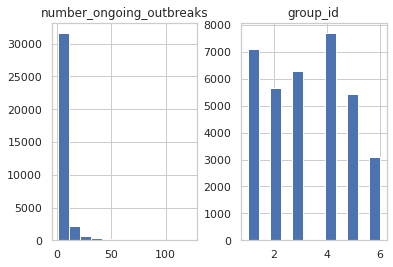

In [97]:
hist1=df.hist(bins=12)
plt.show()

**covid outbreak seaborn pairplot by PHU in Ontario **

In [ ]:
df.columns

Index(['date', 'phu_name', 'number_ongoing_outbreaks', 'group_id',
       'group_name', 'day_of_week', 'weekend/day'],
      dtype='object')

In [98]:
by_date = df.groupby('date')['group_id', 'number_ongoing_outbreaks'].sum().reset_index()

df_melt_bydate = by_date.melt(id_vars='date', value_vars=[ 'number_ongoing_outbreaks'])
df_melt_bydate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,variable,value
0,2020-11-01,number_ongoing_outbreaks,460
1,2020-11-02,number_ongoing_outbreaks,460
2,2020-11-03,number_ongoing_outbreaks,473
3,2020-11-04,number_ongoing_outbreaks,491
4,2020-11-05,number_ongoing_outbreaks,502
...,...,...,...
373,2021-11-09,number_ongoing_outbreaks,204
374,2021-11-10,number_ongoing_outbreaks,221
375,2021-11-11,number_ongoing_outbreaks,231
376,2021-11-12,number_ongoing_outbreaks,249


In [99]:
fig = px.line(df_melt_bydate, x='date' , y='value' , color='variable',title = 'Covid outbreak in ontario')
fig.add_annotation(x="2021-11-13", y=243, xref="x", yref="y",
        text="The curve starts being flattened", showarrow=True,
        font=dict( family="Courier New, monospace", size=12, color="#ffffff"),
        align="center", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="#636363",
        ax=20, ay=-30, bordercolor="#c7c7c7", borderwidth=2, borderpad=4, bgcolor="#ff7f0e", opacity=0.8)
fig.update_layout(showlegend=True)
fig.show()
fig = px.line(df_melt_bydate, x='date' , y='value' , color='variable',
             title = 'Covid outbreak in ontario (Logarithmic Scale)',\
              log_y = True)
fig.show()

In [101]:
temp = df.groupby(['phu_name','date']).sum().reset_index()
country_df =df.groupby('phu_name').sum().reset_index()
ls =country_df[country_df['number_ongoing_outbreaks']>1000]['phu_name'].unique()
temp = temp[temp['phu_name'].isin(list(ls))]
a = temp.groupby('phu_name')
counter = 0
fig = make_subplots(rows = ls.reshape(-1,2).shape[0],cols = ls.reshape(-1,2).shape[1],subplot_titles = list(ls))

for i in  range(1,ls.reshape(-1,2).shape[0]+1):
    for j in range(1,ls.reshape(-1,2).shape[1]+1):
        b = a.get_group(ls[counter])
        fig.add_trace(go.Scatter(x=b['date'], y=b['number_ongoing_outbreaks'],mode='lines',name=ls[counter]), row=i, col=j)
        counter = counter+1
fig.update_layout(height=2000, width=800, title_text="Covid Cases>1000",showlegend=False)
fig.layout.template ='plotly_dark'
fig.show()

In [102]:
city_data = df.groupby('phu_name').sum()
city_data[["number_ongoing_outbreaks"]].style.background_gradient(cmap='Reds')

,number_ongoing_outbreaks
phu_name,
ALGOMA DISTRICT,903
BRANT COUNTY,2185
CHATHAM-KENT,1272
CITY OF HAMILTON,8067
CITY OF OTTAWA,9045
DURHAM REGION,8987
EASTERN ONTARIO,3056
GREY BRUCE,637
HALDIMAND-NORFOLK,2338


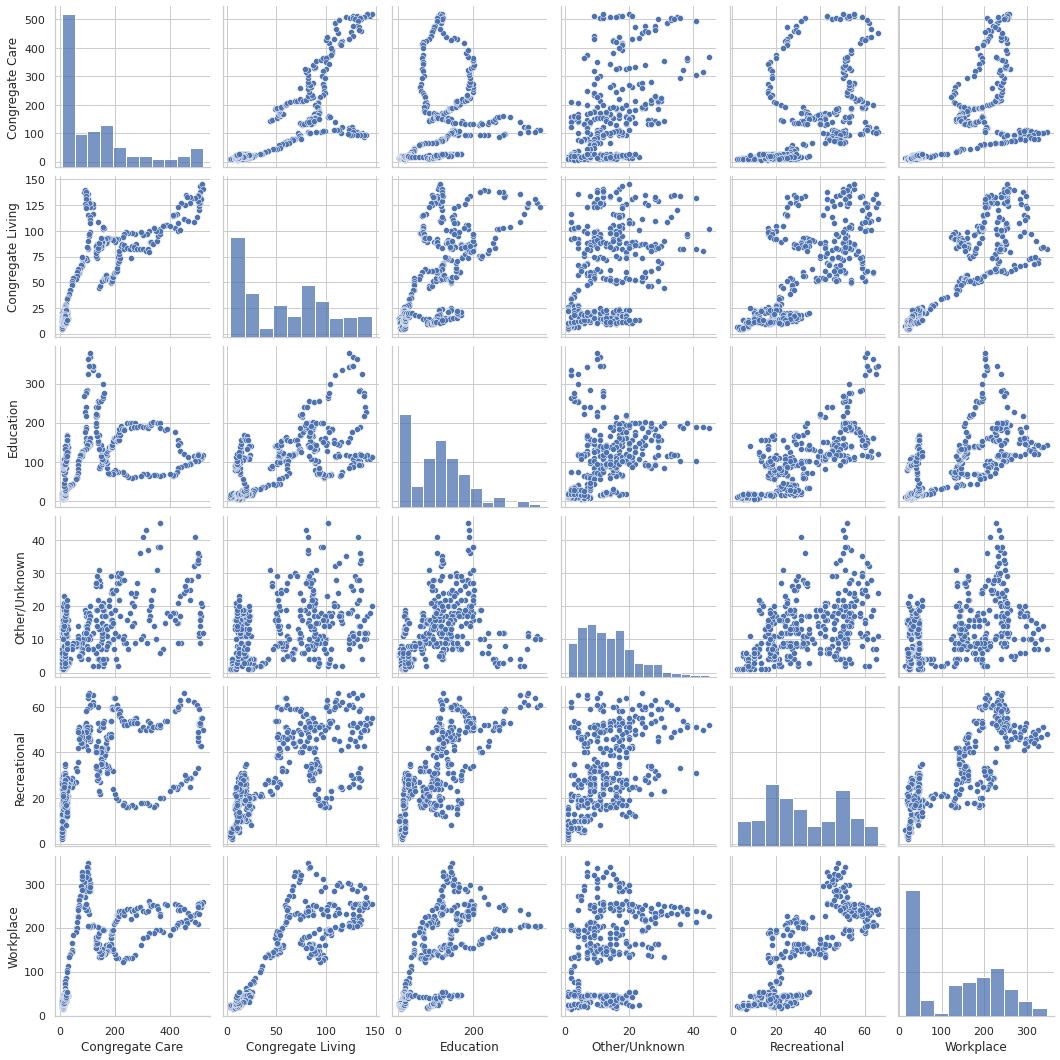

In [103]:
df = df.groupby(['date', 'group_name'])['number_ongoing_outbreaks'].sum().reset_index()
sns.pairplot(df[df.date < '2021-12-02'].pivot(index='date', columns='group_name', values='number_ongoing_outbreaks'));